In [1]:
import numpy as np
import pandas as pd
import importlib
import dataset
import config, plotting, sample, SampleCharacter, XLim, QRselection
import QrModels

importlib.reload(config)
importlib.reload(dataset)
importlib.reload(plotting)
importlib.reload(sample)
importlib.reload(SampleCharacter)
importlib.reload(XLim)
importlib.reload(QRselection)
importlib.reload(QrModels)

<module 'QrModels' from 'D:\\netSVG\\QrModels.py'>

In [2]:
import os
dataset_config = config.DatasetConfig(scenario="functional", n_instance=1000)

assert(dataset_config.scenario == "functional" 
      )
fig_dir = f"../figures/{dataset_config.scenario}"

try:
    os.mkdir(fig_dir)
    print(f"Directory {fig_dir} created ") 
except FileExistsError:
    print(f"Directory {fig_dir} already exists replacing files in this notebook")


Directory ../figures/functional already exists replacing files in this notebook


In [3]:
X_test,Y_test = dataset.get_functional_test_data()

print("x_test:")
print(X_test)
print("y_test:")
print(Y_test)

x_test:
[[0.8492 0.3298]
 [0.7384 0.7672]
 [0.4299 0.1582]
 [0.2072 0.2864]
 [0.3234 0.6871]
 [0.3752 0.5121]
 [0.8171 0.7321]
 [0.5317 0.7498]
 [0.7743 0.2395]
 [0.3346 0.6629]
 [0.5746 0.8162]
 [0.8639 0.7939]
 [0.1986 0.4691]
 [0.6725 0.3095]
 [0.9018 0.6876]
 [0.4965 0.8296]
 [0.4128 0.068 ]
 [0.2343 0.6137]
 [0.775  0.8715]
 [0.9122 0.7888]]
y_test:
[0.9312 1.311  1.605  1.6383 2.7847 2.6119 1.8783 1.5906 0.6192 2.8536
 1.0994 1.8812 2.8353 0.2018 2.8333 1.2912 1.6482 3.3226 0.9821 2.3591]


In [4]:
X_train,Y_train = dataset.get_functional_train_data()

print("x_train:")
print(X_train)
print("y_train:")
print(Y_train)

x_train:
[[0.4522 0.3192]
 [0.3904 0.2042]
 [0.9764 0.07  ]
 [0.5233 0.95  ]
 [0.1109 0.1412]
 [0.3299 0.7213]
 [0.3421 0.9288]
 [0.5211 0.4073]
 [0.1203 0.5209]
 [0.6255 0.2191]
 [0.3466 0.8424]
 [0.1992 0.9869]
 [0.2983 0.7699]
 [0.8899 0.7061]
 [0.5014 0.5953]
 [0.277  0.7529]
 [0.534  0.4967]
 [0.5743 0.8651]
 [0.0148 0.9685]
 [0.7028 0.0988]
 [0.5067 0.547 ]
 [0.3813 0.403 ]
 [0.0649 0.107 ]
 [0.3586 0.7242]
 [0.2035 0.783 ]
 [0.8138 0.5666]
 [0.3934 0.8113]
 [0.0536 0.5768]
 [0.3751 0.944 ]
 [0.1653 0.5076]]
y_train:
[0.7824 1.4808 2.7607 1.1487 2.4417 2.5728 1.8034 1.1039 3.2106 0.5796
 1.8635 2.5832 2.4064 2.621  2.3293 2.5767 1.8732 0.9187 2.2113 1.0467
 2.2373 1.6296 2.3883 2.4399 2.5703 2.3635 1.8007 3.2736 1.7206 3.154 ]


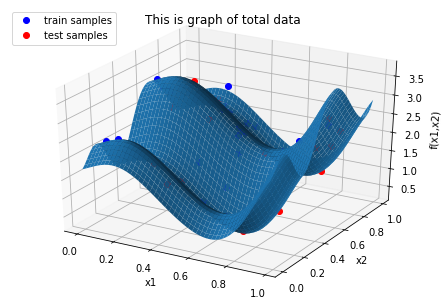

In [5]:
exp_config = config.Config(
    model=config.ModelConfig(activation="elu", lr_gen=0.0001, dec_gen=0, lr_disc=0.001, optim_gen="Adam", 
                             optim_disc="Adam", z_input_size=1),
    training=config.TrainingConfig(n_epochs=2000, batch_size=100, n_samples=100),
    dataset=dataset_config,
    run=config.RunConfig(save_fig=1)
)

plotting.plot_front(X_train, Y_train, X_test, Y_test, exp_config, fig_dir)


In [6]:
coef = sample.get_sta_reg_cov(X_train,Y_train)

Unstandardized regression coefficient: 
[-1.08468  0.09633]
normal coefficient: 
2.44233
Standardized regression coefficient: 
[-0.36156  0.0381 ]
normal coefficient: 
-0.0


In [7]:
imp = sample.get_importance(coef,Y_train)

y std:
0.71508
The importance for every dimension:
[0.50562 0.05328]


In [8]:
length = sample.get_sample_length(X_train,imp)

Euclidean distance in x domain：
[[0.000e+00 1.700e-02 3.370e-01 4.030e-01 1.480e-01 1.770e-01 3.840e-01
  1.300e-02 1.510e-01 4.000e-02 2.850e-01 5.100e-01 2.270e-01 3.410e-01
  7.900e-02 2.190e-01 3.800e-02 3.130e-01 6.130e-01 1.110e-01 5.500e-02
  1.200e-02 1.950e-01 1.730e-01 2.770e-01 1.920e-01 2.460e-01 2.250e-01
  3.960e-01 1.180e-01]
 [1.700e-02 0.000e+00 3.610e-01 5.740e-01 8.200e-02 2.710e-01 5.270e-01
  5.800e-02 1.730e-01 5.500e-02 4.090e-01 6.490e-01 3.280e-01 5.010e-01
  1.650e-01 3.140e-01 1.060e-01 4.710e-01 7.250e-01 1.090e-01 1.310e-01
  4.000e-02 1.150e-01 2.710e-01 3.700e-01 3.110e-01 3.690e-01 2.520e-01
  5.480e-01 1.430e-01]
 [3.370e-01 3.610e-01 0.000e+00 9.800e-01 7.540e-01 8.420e-01 1.140e+00
  3.210e-01 9.360e-01 1.450e-01 9.930e-01 1.445e+00 9.500e-01 4.120e-01
  5.020e-01 9.560e-01 3.780e-01 7.940e-01 1.732e+00 7.600e-02 4.480e-01
  4.650e-01 8.320e-01 8.100e-01 1.106e+00 2.730e-01 8.890e-01 1.108e+00
  1.125e+00 8.490e-01]
 [4.030e-01 5.740e-01 9.800e-01 0.0

In [9]:
x_min = np.amin(X_train, axis=0)
x_max = np.amax(X_train, axis=0)
L = sample.get_x_len(x_min, x_max)

The value area of x in the sample is between 0.0148 and 0.9764in the dimension of No. 0
The value area of x in the sample is between 0.07 and 0.9869in the dimension of No. 1
The full length of every dimension:
[0.9616 0.9169]


In [10]:
n_sample,length = sample.divide_sample(length, L)

The number of diversions of the 0th dimension is: 102
102
The number of diversions of the 1th dimension is: 917
917
总的样方分割数为：
93534
The number of diversions of the 0th dimension is: 85
85
The number of diversions of the 1th dimension is: 765
765
总的样方分割数为：
65025
The number of diversions of the 0th dimension is: 71
71
The number of diversions of the 1th dimension is: 637
637
总的样方分割数为：
45227
The number of diversions of the 0th dimension is: 59
59
The number of diversions of the 1th dimension is: 531
531
总的样方分割数为：
31329
The number of diversions of the 0th dimension is: 49
49
The number of diversions of the 1th dimension is: 443
443
总的样方分割数为：
21707
The number of diversions of the 0th dimension is: 41
41
The number of diversions of the 1th dimension is: 369
369
总的样方分割数为：
15129
The number of diversions of the 0th dimension is: 34
34
The number of diversions of the 1th dimension is: 308
308
总的样方分割数为：
10472
The number of diversions of the 0th dimension is: 29
29
The number of diversions of the 

In [11]:
sample_list = []
con_list = []



第0维度，最小的x为0.0148
index= 0
第0维度的x生成的值有：
[0.0148, 0.26745543283560075, 0.5201108656712016, 0.7727662985068023]
第1维度，最小的x为0.07
index= 1
第1维度的x生成的值有：
[0.07, 0.09662333328088524, 0.12324666656177045, 0.14986999984265567, 0.1764933331235409, 0.20311666640442613, 0.22973999968531134, 0.25636333296619657, 0.2829866662470818, 0.30960999952796703, 0.33623333280885226, 0.3628566660897375, 0.38947999937062266, 0.4161033326515079, 0.4427266659323931, 0.46934999921327836, 0.4959733324941636, 0.5225966657750488, 0.5492199990559341, 0.5758433323368193, 0.6024666656177045, 0.6290899988985896, 0.655713332179475, 0.6823366654603602, 0.7089599987412454, 0.7355833320221306, 0.7622066653030157, 0.7888299985839011, 0.8154533318647863, 0.8420766651456715, 0.8686999984265567, 0.895323331707442, 0.9219466649883272, 0.9485699982692124, 0.9751933315500976]
生成的x值：
[[0.0148, 0.26745543283560075, 0.5201108656712016, 0.7727662985068023], [0.07, 0.09662333328088524, 0.12324666656177045, 0.14986999984265567, 0.17649333

In [ ]:
gen_x = sample.gen_x_center(X_train,length,n_sample)

In [12]:
gen_sample_point = sample.gen_product(gen_x)
print("生成的样方中心点：")
gen_sample_point = np.array(gen_sample_point)
print(gen_sample_point)

生成的样方中心点：
[[0.0148     0.07      ]
 [0.0148     0.09662333]
 [0.0148     0.12324667]
 [0.0148     0.14987   ]
 [0.0148     0.17649333]
 [0.0148     0.20311667]
 [0.0148     0.22974   ]
 [0.0148     0.25636333]
 [0.0148     0.28298667]
 [0.0148     0.30961   ]
 [0.0148     0.33623333]
 [0.0148     0.36285667]
 [0.0148     0.38948   ]
 [0.0148     0.41610333]
 [0.0148     0.44272667]
 [0.0148     0.46935   ]
 [0.0148     0.49597333]
 [0.0148     0.52259667]
 [0.0148     0.54922   ]
 [0.0148     0.57584333]
 [0.0148     0.60246667]
 [0.0148     0.62909   ]
 [0.0148     0.65571333]
 [0.0148     0.68233667]
 [0.0148     0.70896   ]
 [0.0148     0.73558333]
 [0.0148     0.76220667]
 [0.0148     0.78883   ]
 [0.0148     0.81545333]
 [0.0148     0.84207667]
 [0.0148     0.8687    ]
 [0.0148     0.89532333]
 [0.0148     0.92194666]
 [0.0148     0.94857   ]
 [0.0148     0.97519333]
 [0.26745543 0.07      ]
 [0.26745543 0.09662333]
 [0.26745543 0.12324667]
 [0.26745543 0.14987   ]
 [0.26745543 0.

In [13]:
gen_x_point = sample.gen_true_x(X_train,gen_sample_point,length)
print(gen_x_point)


[[0.0148     0.07      ]
 [0.0148     0.12324667]
 [0.0148     0.17649333]
 [0.0148     0.20311667]
 [0.0148     0.22974   ]
 [0.0148     0.25636333]
 [0.0148     0.28298667]
 [0.0148     0.30961   ]
 [0.0148     0.33623333]
 [0.0148     0.36285667]
 [0.0148     0.38948   ]
 [0.0148     0.41610333]
 [0.0148     0.44272667]
 [0.0148     0.46935   ]
 [0.0148     0.49597333]
 [0.0148     0.54922   ]
 [0.0148     0.60246667]
 [0.0148     0.62909   ]
 [0.0148     0.65571333]
 [0.0148     0.68233667]
 [0.0148     0.70896   ]
 [0.0148     0.73558333]
 [0.0148     0.76220667]
 [0.0148     0.78883   ]
 [0.0148     0.81545333]
 [0.0148     0.84207667]
 [0.0148     0.8687    ]
 [0.0148     0.89532333]
 [0.0148     0.92194666]
 [0.0148     0.94857   ]
 [0.26745543 0.07      ]
 [0.26745543 0.09662333]
 [0.26745543 0.12324667]
 [0.26745543 0.14987   ]
 [0.26745543 0.17649333]
 [0.26745543 0.22974   ]
 [0.26745543 0.25636333]
 [0.26745543 0.28298667]
 [0.26745543 0.30961   ]
 [0.26745543 0.33623333]


In [14]:
del_x_points = sample.del_x(gen_sample_point, gen_x_point)

print(del_x_points)


[[0.0148     0.09662333]
 [0.0148     0.14987   ]
 [0.0148     0.52259667]
 [0.0148     0.57584333]
 [0.0148     0.97519333]
 [0.26745543 0.20311667]
 [0.26745543 0.41610333]
 [0.26745543 0.49597333]
 [0.26745543 0.70896   ]
 [0.26745543 0.73558333]
 [0.26745543 0.76220667]
 [0.26745543 0.78883   ]
 [0.26745543 0.81545333]
 [0.26745543 0.84207667]
 [0.26745543 0.92194666]
 [0.26745543 0.94857   ]
 [0.26745543 0.97519333]
 [0.52011087 0.22974   ]
 [0.52011087 0.30961   ]
 [0.52011087 0.41610333]
 [0.52011087 0.49597333]
 [0.52011087 0.54922   ]
 [0.52011087 0.60246667]
 [0.52011087 0.8687    ]
 [0.52011087 0.94857   ]
 [0.7727663  0.09662333]
 [0.7727663  0.57584333]
 [0.7727663  0.70896   ]]


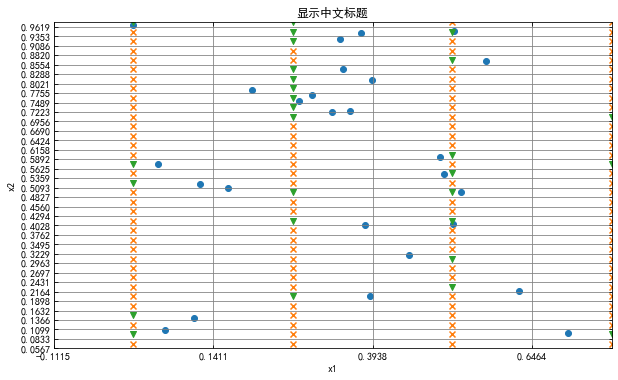

In [15]:
plotting.plot_genx(X_train, gen_x_point, del_x_points, length, n_sample)

In [16]:
import GPy

noise = 1
length_ = 1

run_hyperopt_search = True

kernel = GPy.kern.RBF(input_dim=2, variance=noise, lengthscale=length_)
#Y_train = np.reshape((-1,1))
gpr = GPy.models.GPRegression(X_train, Y_train.reshape(-1,1), kernel)
if run_hyperopt_search:
    gpr.optimize(messages=True) 


In [17]:
gen_y, cov_train = gpr.predict(gen_x_point)


In [18]:
import statsmodels.api as sm
qrX = X_train
qrX = sm.add_constant(qrX[0:])
qr = sm.QuantReg(Y_train.reshape(-1,1),qrX)
res = qr.fit(q=.2)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2960
Model:                       QuantReg   Bandwidth:                       1.146
Method:                 Least Squares   Sparsity:                        2.326
Date:                Wed, 26 Aug 2020   No. Observations:                   30
Time:                        09:08:57   Df Residuals:                       27
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5650      0.695      3.692      0.001       1.140       3.990
x1            -2.8775      0.796     -3.617      0.001      -4.510      -1.245
x2             0.0942      0.791      0.119      0.906      -1.528       1.717


In [19]:
quantiles = np.arange(.05, .96, .1)
quantiles = np.around(quantiles, decimals=3)
def fit_model(q):
    res = qr.fit(q=q)
    return q, np.around(res.params,decimals=  4)

models = []

for x in quantiles:
    q, param = fit_model(x)
    model = QrModels.QrModels(q, param[0], param[1:])
    models.append(model)

#models = pd.DataFrame(models, columns=['q', 'a', 'b0', 'b1'])
for model in models:
    print(str(model.q)+'\t'+str(model.a)+'\t'+str(model.param))

ols = sm.OLS(Y_train.reshape(-1,1),qrX).fit()
           
for ol in ols.params:
    print(str(ol))


 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:235: RuntimeWarning:invalid value encountered in less_equal
 D:\CondaEnv\netSVGpython36\lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning:Maximum number of iterations (1000) reached.


0.05	1.5307	[-2.1743  0.736 ]
0.15	2.5677	[-3.2895  0.3183]
0.25	2.547	[-2.864   0.2543]
0.35	2.525	[-2.1032 -0.0023]
0.45	2.5091	[-2.1013  0.1458]
0.55	2.4922	[-0.7705  0.2478]
0.65	2.4692	[-0.5318  0.2228]
0.75	2.7868	[-0.4381 -0.1179]
0.85	3.899	[-1.086  -1.1141]
0.95	3.4968	[-0.731 -0.319]
2.442331164960009
-1.0846771586848056
0.09632890094793461


In [20]:

gen_y2, cov_train2 = gpr.predict(gen_sample_point)
XLim.con_s(gen_sample_point, length, n_sample, sample_list, gen_y2)


#


XLim.con_sample(con_list, X_train, gen_x_point, del_x_points, sample_list, n_sample, length)
XLim.sample_attri(sample_list, X_train, gen_x_point, del_x_points, Y_train)

#

print(np.percentile(Y_train,20))

#

y_quantile = [0.691, 1.084, 1.592, 1.803, 2.194, 2.365, 2.440, 2.574, 2.670, 3.239]


#

vir_xpoint = []
vir_ypoint = []

1.4143800000000002


In [21]:
import QRselection
import importlib
importlib.reload(QRselection)


QRselection.qr_selection(con_list, models, vir_xpoint, vir_ypoint,y_quantile, gen_x_point, ols)

x1 No.1 gap
Accepted point:
[0.26745543 0.09662333]	[2.69742866]
Accepted point:
[0.52011087 0.09662333]	[1.63110353]
x1 No.13 gap
Accepted point:
[0.0148     0.41610333]	[2.30468475]
Bad point:
[0.7727663  0.41610333]	[1.51508138]
x1 No.16 gap
Bad point:
[0.0148     0.49597333]	[2.82274412]
Bad point:
[0.7727663  0.49597333]	[1.94086473]
x1 No.19 gap
Bad point:
[0.26745543 0.57584333]	[3.14683057]
Bad point:
[0.52011087 0.57584333]	[2.25833529]
x1 No.24 gap
Accepted point:
[0.0148  0.70896]	[2.89838962]
Bad point:
[0.52011087 0.70896   ]	[1.7947791]
x1 No.33 gap
Accepted point:
[0.0148  0.94857]	[2.11739017]
Accepted point:
[0.7727663 0.94857  ]	[0.81938969]
x1 No.34 gap
Bad point:
[0.52011087 0.97519333]	[1.24364821]
Bad point:
[0.7727663  0.97519333]	[0.7283874]
x1 No.26 gap
Bad point:
[0.0148     0.76220667]	[2.56492672]
Accepted point:
[0.52011087 0.76220667]	[1.47549879]
Bad point:
[0.7727663  0.76220667]	[1.66791539]
x0 No.1 gap
Bad point:
[0.26745543 0.07      ]	[2.79754305]
Ac

ValueError: max() arg is an empty sequence

In [ ]:
plotting.plot_genx(X_train, gen_x_point, np.array(vir_xpoint), length, n_sample)


